You are probably suffering from  Coronary ArteryDisease
You should take  Dimenhydrinate
Probably consult a  Pulmonologist 

Here are some  Pulmonologist :-

           Doctor Name Specialization  Rating
2      Mikayla Rodgers  Pulmonologist    3.90
13       Rayan O’Neill  Pulmonologist    3.00
22       Yamileth Kemp  Pulmonologist    3.40
24      Makayla Franco  Pulmonologist    4.15
32        Saoirse Pham  Pulmonologist    1.15
33    Russell Cisneros  Pulmonologist    2.95
48        Fatima Banks  Pulmonologist    0.80
60     Adelyn Erickson  Pulmonologist    0.30
61       Johnny Barber  Pulmonologist    1.30
75        Yosef Chavez  Pulmonologist    3.40
76        Nevaeh Parra  Pulmonologist    1.75
93      Lucian Burnett  Pulmonologist    3.45
95      Dakota Guevara  Pulmonologist    0.65
103     Jameson Pruitt  Pulmonologist    3.95
104      Brylee Walker  Pulmonologist    3.40
118  Zaniyah Stevenson  Pulmonologist    2.25
119      Callan O’Neal  Pulmonologist    1.00
133    Maverick

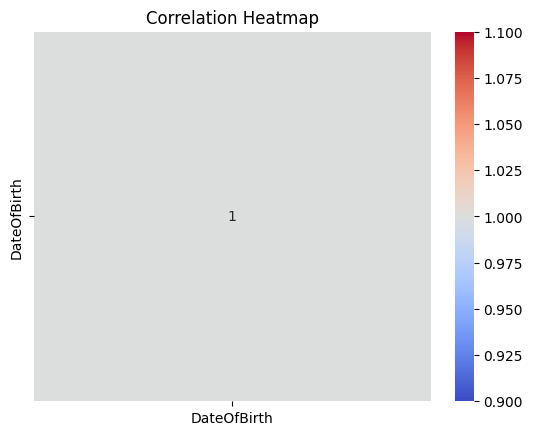

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

import re

data = pd.read_csv('DATA_MODIFIED.csv')
data2 = pd.read_csv('Doctors.csv')

data.isnull().sum()

missing_values = data.isnull().sum()

data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'], errors='coerce', dayfirst=True)

median_date = data['DateOfBirth'].dropna().median()

# Fill missing values with the median date
data['DateOfBirth'].fillna(median_date, inplace=True)
categorical_columns = ['Gender', 'Symptoms', 'Causes', 'Disease', 'Medicine','Doctor Specialist']
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check for missing values in each column
missing_values = data.isnull().sum()

data['Name'].fillna('Unknown', inplace=True)

data.isnull().sum()

missing_values = data.isnull().sum()

import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

sns.countplot(data=data, x='Medicine')
plt.title('Distribution of Medicine')

numeric_columns = ['DateOfBirth']
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

# splitting the datset: We divide the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X = data.drop(['Name', 'Medicine', 'Disease', 'Doctor Specialist', 'DateOfBirth'], axis=1)
y_disease = data['Disease']
y_medicine = data['Medicine']
y_doctor = data['Doctor Specialist']
X_train, X_test, y_disease_train, y_disease_test, y_medicine_train, y_medicine_test, y_doctor_train, y_doctor_test = train_test_split(X, y_disease, y_medicine, y_doctor, test_size=0.5, random_state=42)
dt_classifier_disease = DecisionTreeClassifier(random_state=42)
dt_classifier_disease.fit(X_train, y_disease_train)
rf_classifier_medicine = RandomForestClassifier(random_state=42)
rf_classifier_medicine.fit(X_train, y_medicine_train)
rf_classifier_doctor = RandomForestClassifier(random_state=42)
rf_classifier_doctor.fit(X_train, y_doctor_train)

# Save the trained models
joblib.dump(dt_classifier_disease, 'dt_classifier_disease.joblib')
joblib.dump(rf_classifier_medicine, 'rf_classifier_medicine.joblib')
joblib.dump(rf_classifier_doctor, 'rf_classifier_doctor.joblib')

# Load the models
dt_classifier_disease = joblib.load('dt_classifier_disease.joblib')
rf_classifier_medicine = joblib.load('rf_classifier_medicine.joblib')
rf_classifier_doctor = joblib.load('rf_classifier_doctor.joblib')

new_data = {
    'Name': ['Alice'],
    'Gender': ['2'],
    'DateOfBirth': ['01-01-1980'],
    'Symptoms': ['23'],
    'Causes': ['52']
}


new_data = pd.DataFrame(new_data)

new_data = new_data.drop('Name', axis=1)
new_data = new_data.drop('DateOfBirth', axis=1)

predicted_disease = dt_classifier_disease.predict(new_data)

# Predict Medicine
predicted_medicine = rf_classifier_medicine.predict(new_data)

# Predict Doctor Specialist
predicted_doctor = rf_classifier_doctor.predict(new_data)

disease = label_encoders['Disease'].inverse_transform(predicted_doctor)
medicine = label_encoders['Medicine'].inverse_transform(predicted_doctor)
doctor = label_encoders['Doctor Specialist'].inverse_transform(predicted_doctor)

print("You are probably suffering from ", disease[0])
print("You should take ", medicine[0])
print("Probably consult a ", doctor[0],"\n")

DoctorRatings = data2[data2['Specialization'] == doctor[0]]

print("Here are some ", doctor[0], ":-\n")

print(DoctorRatings)